In [9]:
import pandas as pd
import numpy as np
import sklearn

In [15]:
house_data = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt', index_col='Unnamed: 0')


In [16]:
house_data.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000


In [17]:
fetaures_name = house_data.columns
target = house_data.Price

In [18]:
fetaures_name


Index(['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom',
       'Price'],
      dtype='object')

In [19]:
# store the values in dataframe
house_data.columns = fetaures_name
house_data.Price = target

In [20]:
import seaborn as sns

<AxesSubplot:>

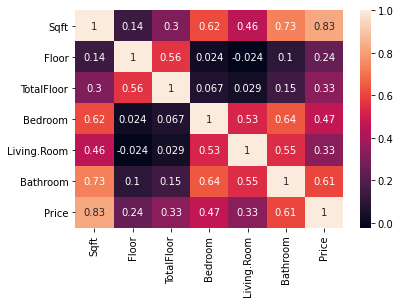

In [21]:
#corr = house_data.heatmap
corr = house_data.corr()
sns.heatmap(corr, annot = True)

In [22]:
# split X and y
X = house_data.iloc[:, :-1]
y = house_data.iloc[:, -1]

In [24]:
# split into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
# Apply knn
from sklearn.neighbors import KNeighborsRegressor
nn_model = KNeighborsRegressor(n_neighbors = 2)
nn_model.fit(X_train,y_train)
y_pred = nn_model.predict(X_test)

In [27]:

print(nn_model.score(X_train,y_train))
print(nn_model.score(X_test, y_test))

0.8800733083373363
0.8149795812739481


In [28]:
#Better value for k
from sklearn.neighbors import KNeighborsRegressor
value_k = []

for k in range(2, 11):
    nn_model = KNeighborsRegressor(n_neighbors = k)
    nn_model.fit(X_train, y_train)
    y_predict = nn_model.predict(X_test)
    value_k.append({k,nn_model.score(X_train,y_train),nn_model.score(X_test, y_test)})

In [29]:
value_k

[{0.8149795812739481, 0.8800733083373363, 2},
 {0.7798243345672901, 0.816270701771076, 3},
 {0.788823538081094, 0.7914551133040978, 4},
 {0.7645199808344749, 0.7701123265984116, 5},
 {0.7476888762598006, 0.7732990095583596, 6},
 {0.7306294409487604, 0.7553921811077756, 7},
 {0.7224462536728, 0.7529144611946696, 8},
 {0.7092356252440686, 0.7391364008453809, 9},
 {0.7061413761356188, 0.7347959632017562, 10}]

In [30]:
# Best - 88% for k 2